<a href="https://colab.research.google.com/github/paulmachau/Dogecion-Historical-Prices/blob/main/Dogecoin_price_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
!pip install yfinance
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
import plotly.graph_objects as go
!pip install pandas_ta
from statsmodels.tsa.stattools import adfuller, kpss
import pandas_ta as ta
from plotly.subplots import make_subplots

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=f98cca2a675eaa910781bd3dbe2ca54b99227ee72b8c5dc8cb43f1ca8ac39ec4
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


importing the necessary Libraries including yfinance

In [2]:

# Define the ticker symbol for Dogecoin
ticker_symbol = 'DOGE-USD'

# Set the start and end dates for historical data
start_date = '2014-01-01'
end_date = '2024-01-01'

# Download historical data from Yahoo Finance
dogecoin_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Save the data to a CSV file
csv_filename = 'dogecoin_data.csv'
dogecoin_data.to_csv(csv_filename)

# Print the dynamically generated file name
print(csv_filename)


[*********************100%%**********************]  1 of 1 completed

dogecoin_data.csv


Downloading Dogecoin historical data between 2014 to 2024  dates. The data is then saved to a CSV file named 'dogecoin_data.csv'.

In [3]:
#viewing the csv file
dogecoin_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


In [4]:
# Get info about the dataset
dogecoin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2244 entries, 2017-11-09 to 2023-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2244 non-null   float64
 1   High       2244 non-null   float64
 2   Low        2244 non-null   float64
 3   Close      2244 non-null   float64
 4   Adj Close  2244 non-null   float64
 5   Volume     2244 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 122.7 KB


In [5]:
# Display the column name
dogecoin_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


The data consists of 2244 entries and 6 columns

In [6]:
# Check unique values across the entire DataFrame
unique_values_overall = dogecoin_data.nunique()

# Print the unique values
print("Unique Values Overall:")
print(unique_values_overall)


Unique Values Overall:
Open         2013
High         2018
Low          2003
Close        2020
Adj Close    2020
Volume       2244
dtype: int64


In [7]:
# Display the column names
print(dogecoin_data.columns)


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [8]:
dogecoin_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


In [9]:
# Display summary statistics for all columns
summary_statistics_all = dogecoin_data.describe(include='all')

# Print the summary statistics for all columns
print("Summary Statistics for All Columns:")
print(summary_statistics_all)


Summary Statistics for All Columns:
              Open         High          Low        Close    Adj Close  \
count  2244.000000  2244.000000  2244.000000  2244.000000  2244.000000   
mean      0.063036     0.066283     0.059919     0.063085     0.063085   
std       0.090186     0.097103     0.083486     0.090233     0.090233   
min       0.001046     0.001210     0.001002     0.001038     0.001038   
25%       0.002678     0.002751     0.002616     0.002680     0.002680   
50%       0.007405     0.008361     0.006858     0.007473     0.007473   
75%       0.081055     0.083612     0.079213     0.081125     0.081125   
max       0.687801     0.737567     0.608168     0.684777     0.684777   

             Volume  
count  2.244000e+03  
mean   9.250561e+08  
std    3.189198e+09  
min    1.431720e+06  
25%    3.882560e+07  
50%    1.732271e+08  
75%    6.373313e+08  
max    6.941068e+10  


*inferences*
The code above shows a summurry statistics for all the columns  indicating the Mean, Mode, Median and the percentiles

In [10]:
# Display the column names
dogecoin_data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


In [11]:
# Convert the index to datetime
dogecoin_data.index = pd.to_datetime(dogecoin_data.index)

# Now you can proceed with your analysis or visualization code


#EDA

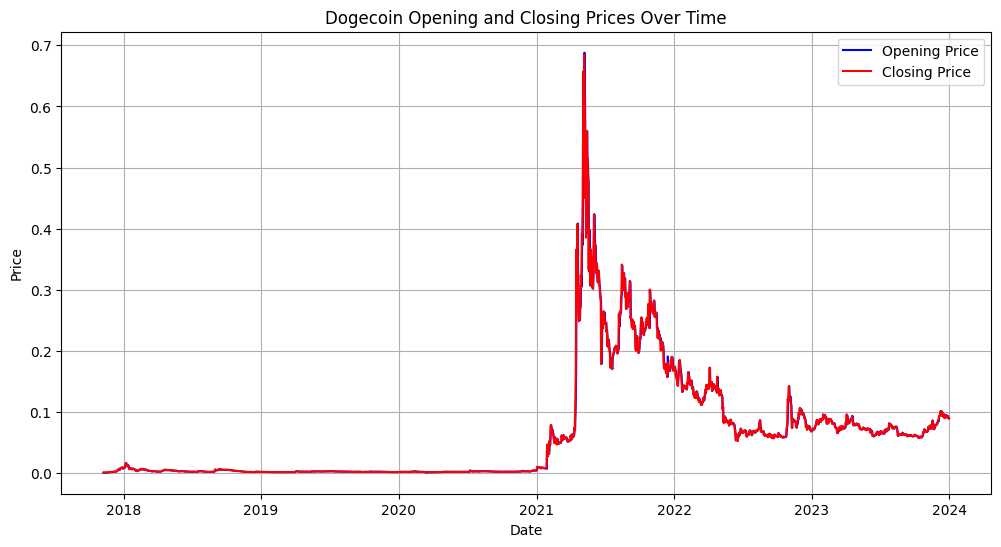

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(dogecoin_data.index, dogecoin_data['Open'], label='Opening Price', color='blue')
plt.plot(dogecoin_data.index, dogecoin_data['Close'], label='Closing Price', color='red')
plt.title('Dogecoin Opening and Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


*inferences*

The graph shows the distribution of the opening and closing prices over time, with red being the closing price and blue being the opening price

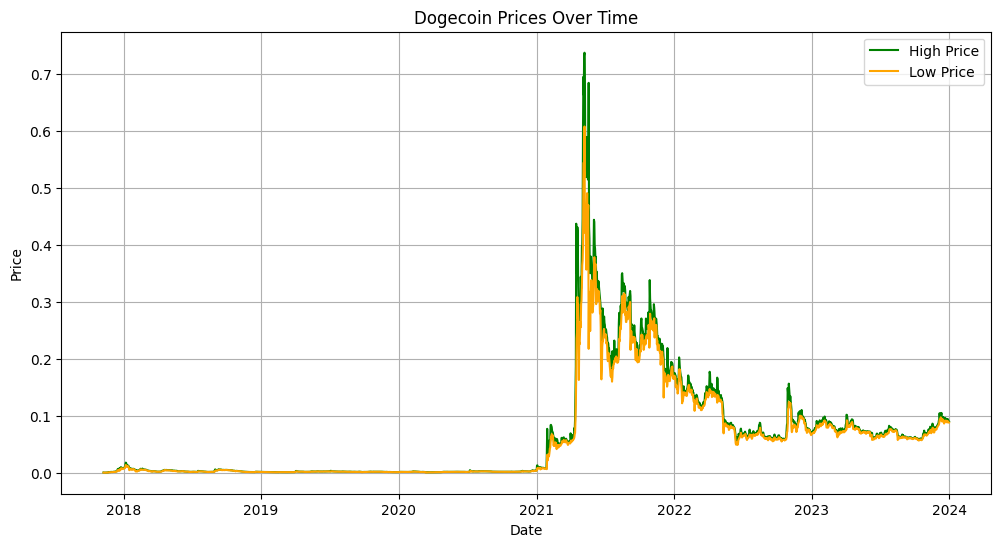

In [13]:

plt.figure(figsize=(12, 6))
plt.plot(dogecoin_data.index, dogecoin_data['High'], label='High Price', color='green')
plt.plot(dogecoin_data.index, dogecoin_data['Low'], label='Low Price', color='orange')
plt.title('Dogecoin Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


**inferences*

The graph shows the high and low prices over time in between 2021 and 2022 being the pick having the highest prices and then falling progressively after that to 2024

**Plots showing the daily and weekly distriution of prices over time**

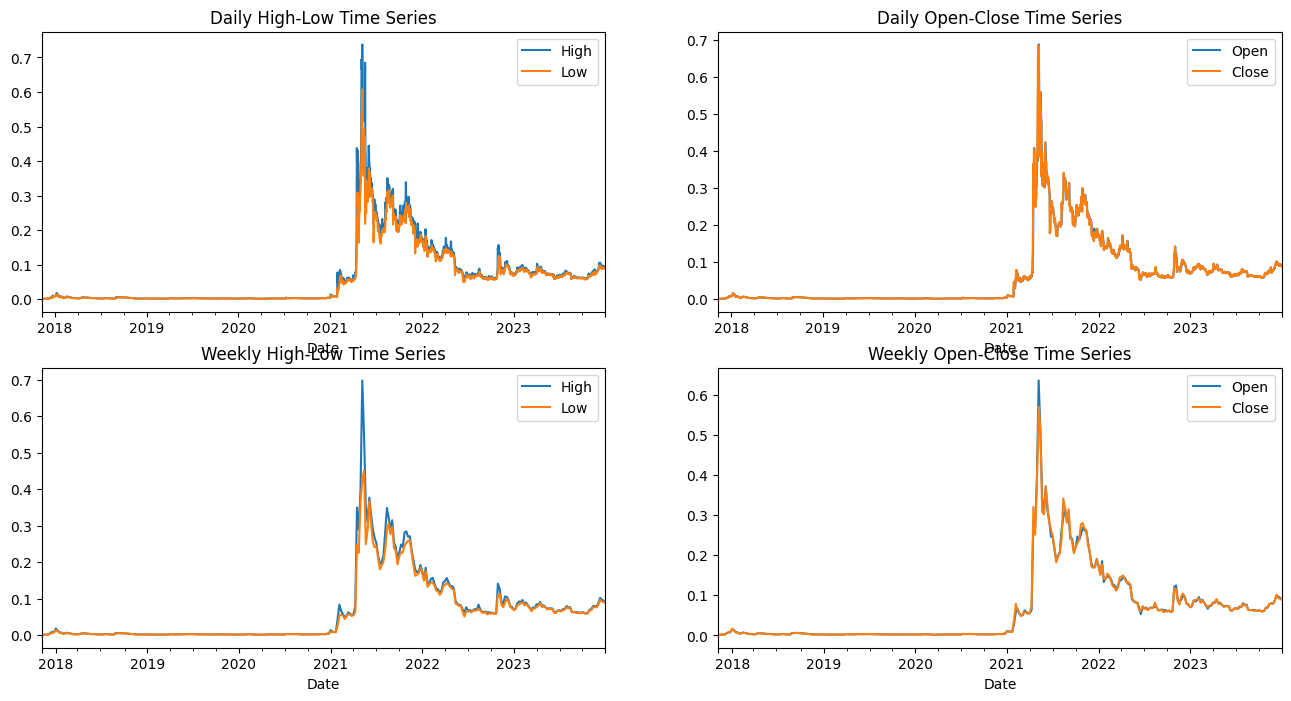

In [14]:
 #Create subplots for different graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

# Daily High-Low Time Series Plot
dogecoin_data[['High', 'Low']].plot(ax=axes[0, 0], title='Daily High-Low Time Series')

# Daily Open-Close Time Series Plot
dogecoin_data[['Open', 'Close']].plot(ax=axes[0, 1], title='Daily Open-Close Time Series')

# Weekly High-Low Time Series Plot
weekly_data = dogecoin_data.resample('W').last()
weekly_data[['High', 'Low']].plot(ax=axes[1, 0], title='Weekly High-Low Time Series')

# Weekly Open-Close Time Series Plot
weekly_data[['Open', 'Close']].plot(ax=axes[1, 1], title='Weekly Open-Close Time Series')

# Adjust layout
plt.show()

*Inferences*

**Daily High-Low Time Series Plot**:

* Volatility: There are small fluctuations between daily high and low prices, it suggests low volatility in the market.

* Trends: Consistent trends over time could indicate a directional movement in prices.

**Daily Open-Close Time Series Plot:**

* Trend Identification: There's a consistent pattern of closing prices being higher or lower than opening prices, it indicates a trend in daily movements.

**Weekly High-Low Time Series Plot:**

* Cycles or Patterns: The repeating patterns on a weekly basis may suggest cyclical behavior.

**Weekly Open-Close Time Series Plot:**

* Long-Term Trends: Similar to daily open-close plots, but on a weekly scale.
* Investor Behavior: Patterns may indicate investor behavior over the course of a week.

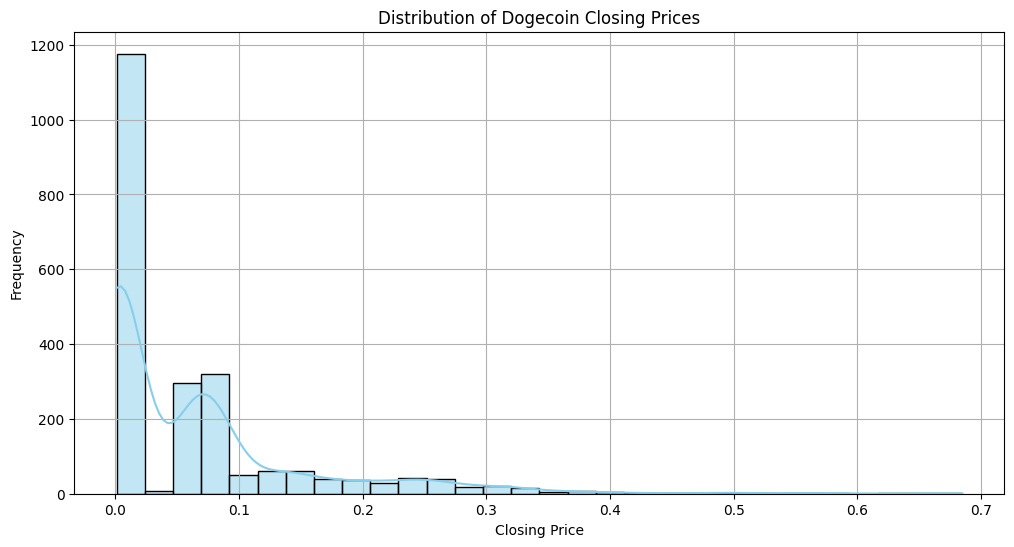

In [15]:

# Plot histogram of Dogecoin closing prices
plt.figure(figsize=(12, 6))
sns.histplot(dogecoin_data['Close'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Dogecoin Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


*Inferences*

The graph show the distribution of closing prices on a histogram  it is skewed to the left (negative skewness), it suggests that there are few instances of very low closing prices

In [16]:
# Resample to weekly frequency
weekly_data = dogecoin_data.resample('W').last()


In [17]:
dogecoin_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


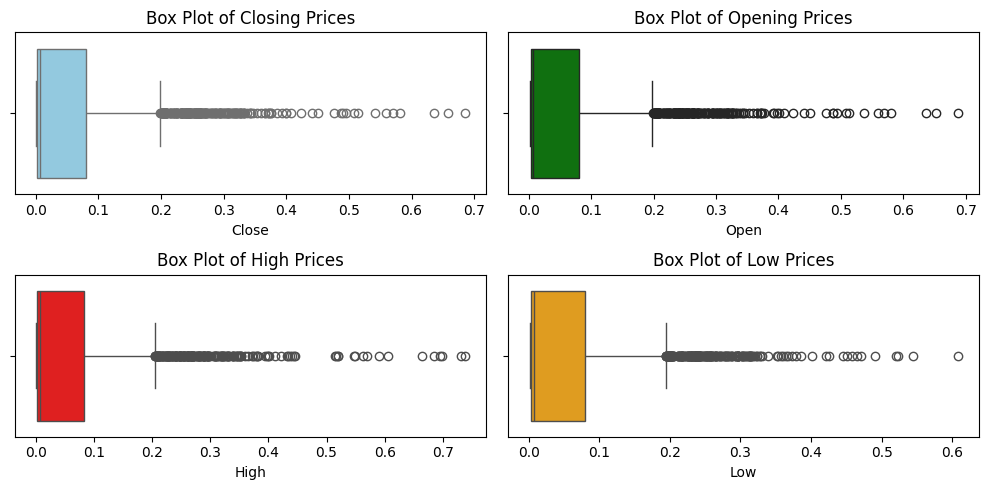

In [18]:
#cheking for outliers and creating box plots to show the distribution
# Set up a 2x2 grid for box plots
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Closing Price Box Plot
sns.boxplot(x=dogecoin_data['Close'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Box Plot of Closing Prices')

# Opening Price Box Plot
sns.boxplot(x=dogecoin_data['Open'], ax=axes[0, 1], color='green')
axes[0, 1].set_title('Box Plot of Opening Prices')

# High Price Box Plot
sns.boxplot(x=dogecoin_data['High'], ax=axes[1, 0], color='red')
axes[1, 0].set_title('Box Plot of High Prices')

# Low Price Box Plot
sns.boxplot(x=dogecoin_data['Low'], ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Box Plot of Low Prices')

plt.tight_layout()
plt.show()

*Inferences*
The graph above shows the box plots indicating the outliers in different variables.

**Closing Price Box Plot**:The box plot for closing prices reveals a relatively symmetrical distribution with a few potential outliers on the higher side.

**Opening Price Box Plot**:The box plot for opening prices mirrors the closing prices' distribution, indicating a strong positive correlation

**High Price Box Plot**:The box plot for high prices shows a wider spread compared to closing and opening prices.

**Low Price Box Plot**;The box plot for low prices exhibits a similar distribution to high prices but with a wider spread.

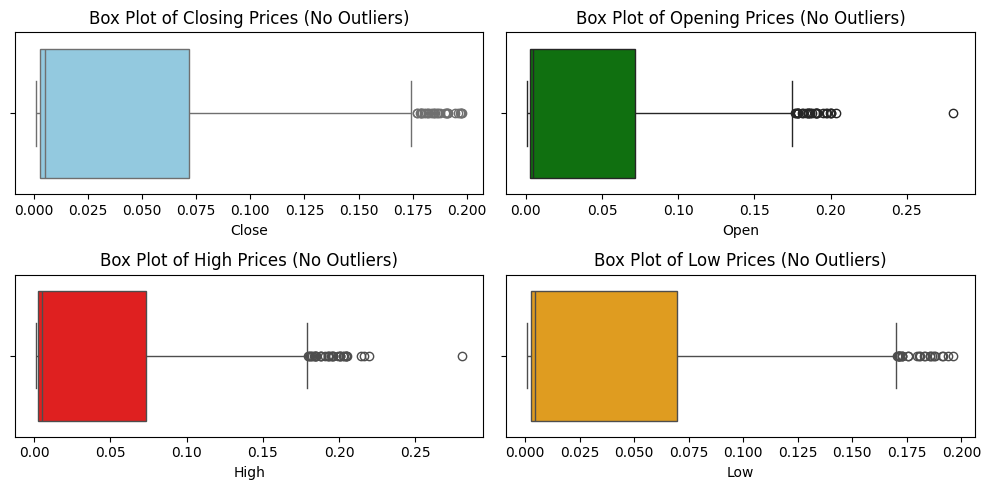

In [19]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Remove outliers from Closing Price
dogecoin_no_outliers = remove_outliers(dogecoin_data, 'Close')

# Set up a 2x2 grid for box plots after removing outliers
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Closing Price Box Plot after removing outliers
sns.boxplot(x=dogecoin_no_outliers['Close'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Box Plot of Closing Prices (No Outliers)')

# Opening Price Box Plot after removing outliers
sns.boxplot(x=dogecoin_no_outliers['Open'], ax=axes[0, 1], color='green')
axes[0, 1].set_title('Box Plot of Opening Prices (No Outliers)')

# High Price Box Plot after removing outliers
sns.boxplot(x=dogecoin_no_outliers['High'], ax=axes[1, 0], color='red')
axes[1, 0].set_title('Box Plot of High Prices (No Outliers)')

# Low Price Box Plot after removing outliers
sns.boxplot(x=dogecoin_no_outliers['Low'], ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Box Plot of Low Prices (No Outliers)')

plt.tight_layout()
plt.show()

*Inferences*


* The graph shows graphical representations after removing outliers and this will creat more accuracy in our data set when modelling

**calculating the Daily Price change between the closing and opening prices**

*The code will add the 'Price_change' and 'Percent_return' columns to the DataFrame df and display the updated DataFrame showing the daily price change and percentage return for each day. This information can be used to analyze the daily performance and volatility of the stock*

In [20]:
# Calculate daily price change
dogecoin_data['Daily_Price_Change'] = dogecoin_data['Close'].diff()

# Calculate daily percentage return
dogecoin_data['Daily_Percentage_Return'] = (dogecoin_data['Daily_Price_Change'] / dogecoin_data['Close']) * 100

# Display the updated dataset
print(dogecoin_data.head())


                Open      High       Low     Close  Adj Close   Volume  \
Date                                                                     
2017-11-09  0.001207  0.001415  0.001181  0.001415   0.001415  6259550   
2017-11-10  0.001421  0.001431  0.001125  0.001163   0.001163  4246520   
2017-11-11  0.001146  0.001257  0.001141  0.001201   0.001201  2231080   
2017-11-12  0.001189  0.001210  0.001002  0.001038   0.001038  3288960   
2017-11-13  0.001046  0.001212  0.001019  0.001211   0.001211  2481270   

            Daily_Price_Change  Daily_Percentage_Return  
Date                                                     
2017-11-09                 NaN                      NaN  
2017-11-10           -0.000252               -21.668094  
2017-11-11            0.000038                 3.164025  
2017-11-12           -0.000163               -15.703272  
2017-11-13            0.000173                14.285717  


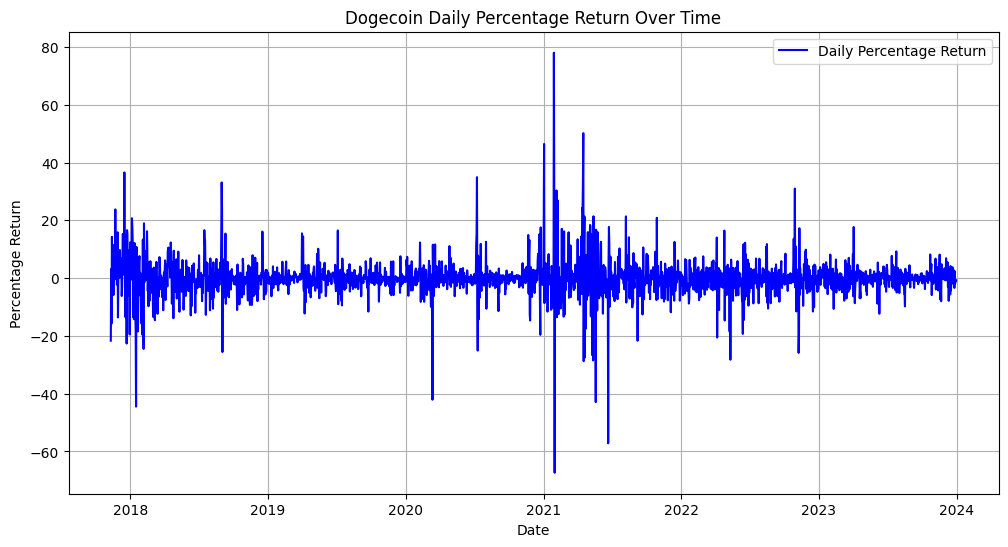

In [21]:
# Create a line plot showing the percentage return over time
plt.figure(figsize=(12, 6))
plt.plot(dogecoin_data.index, dogecoin_data['Daily_Percentage_Return'], label='Daily Percentage Return', color='blue')
plt.title('Dogecoin Daily Percentage Return Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Return')
plt.legend()
plt.grid(True)
plt.show()

**Inferences**

Volatility:The plot has frequent large spikes (both positive and negative), it sugggests higher volatility in daily returns.

Trends: Consistent upward or downward trends in the percentage return  indicate periods of sustained price movement.

Outliers: Large spikes or drops in the percentage return may represent outlier events affecting the market.

In [22]:
# Create a figure
fig = go.Figure(data=[go.Candlestick(x=dogecoin_data.index,
                open=dogecoin_data['Open'],
                high=dogecoin_data['High'],
                low=dogecoin_data['Low'],
                close=dogecoin_data['Close'],
                increasing_line_color='red',  # Red for bearish (closing price < opening price)
                decreasing_line_color='green'  # You can use a different color for bullish days
                )])

# Set layout
fig.update_layout(title='Dogecoin Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

# Show the plot
fig.show()

*Inferences*

* Red Candlesticks: Indicate bearish days where the closing price is lower than the opening price. It suggests a negative sentiment or downward movement.

* Green Candlesticks: Represent bullish days with a closing price higher than the opening price. This suggests a positive sentiment or upward movement.

* Red Candlestick Body: The bottom of the body represents the opening price, and the top represents the closing price. The body being red indicates a bearish day.

* Wicks or Tails: The thin lines (wicks) above and below the body represent the highest and lowest prices reached during the trading day.

* The length of the candlesticks and the range between the high and low prices to gauge the volatility of Dogecoin during the observed period.

**Relative Strength Index (RSI) and  the MACD (Moving Average Convergence Divergence)**:

These indicators can provide insights into trends, momentum, overbought or oversold conditions, and potential reversal points

In [23]:
# Calculate MACD
short_window = 12
long_window = 26
signal_window = 9

dogecoin_data['MACD'], dogecoin_data['Signal'], _ = ta.macd(dogecoin_data['Close'], fast=short_window, slow=long_window, signal=signal_window)

# Plot MACD
fig_macd = go.Figure()
fig_macd.add_trace(go.Scatter(x=dogecoin_data.index, y=dogecoin_data['MACD'], mode='lines', name='MACD Line'))
fig_macd.add_trace(go.Scatter(x=dogecoin_data.index, y=dogecoin_data['Signal'], mode='lines', name='Signal Line'))
fig_macd.update_layout(title='MACD for Dogecoin',
                       xaxis_title='Date',
                       yaxis_title='MACD',
                       xaxis_rangeslider_visible=False)
fig_macd.show()


In [24]:
# Calculate RSI
rsi_length = 14
dogecoin_data['RSI'] = ta.rsi(dogecoin_data['Close'], length=rsi_length)

# Plot RSI
fig_rsi = go.Figure()
fig_rsi.add_trace(go.Scatter(x=dogecoin_data.index, y=dogecoin_data['RSI'], mode='lines', name='RSI'))
fig_rsi.update_layout(title='Relative Strength Index (RSI) for Dogecoin',
                      xaxis_title='Date',
                      yaxis_title='RSI',
                      xaxis_rangeslider_visible=False)
fig_rsi.show()


In [25]:
# Plot combined graph
fig_combined = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)
fig_combined.add_trace(go.Scatter(x=dogecoin_data.index, y=dogecoin_data['Close'], mode='lines', name='Close Price'), row=1, col=1)
fig_combined.add_trace(go.Scatter(x=dogecoin_data.index, y=dogecoin_data['MACD'], mode='lines', name='MACD Line'), row=2, col=1)
fig_combined.add_trace(go.Scatter(x=dogecoin_data.index, y=dogecoin_data['Signal'], mode='lines', name='Signal Line'), row=2, col=1)
fig_combined.update_layout(title='Combined Analysis for Dogecoin',
                           xaxis_title='Date',
                           xaxis_rangeslider_visible=False)
fig_combined.show()


*Inferences*

 * The MACD Signal Line is consistently above the MACD Line, it indicates a bearish trend. This configuration suggests that the short-term moving average (Signal Line) is outperforming the longer-term moving average (MACD Line), signaling potential downward price movement

 * RSI values above 70 indicate overbought conditions, suggesting that the asset may be overvalued, and there is a potential for a price correction.

* RSI values below 30 indicate oversold conditions, suggesting that the asset may be undervalued, and there is a potential for a price rebound.

<ipython-input-26-aa26536738dc>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



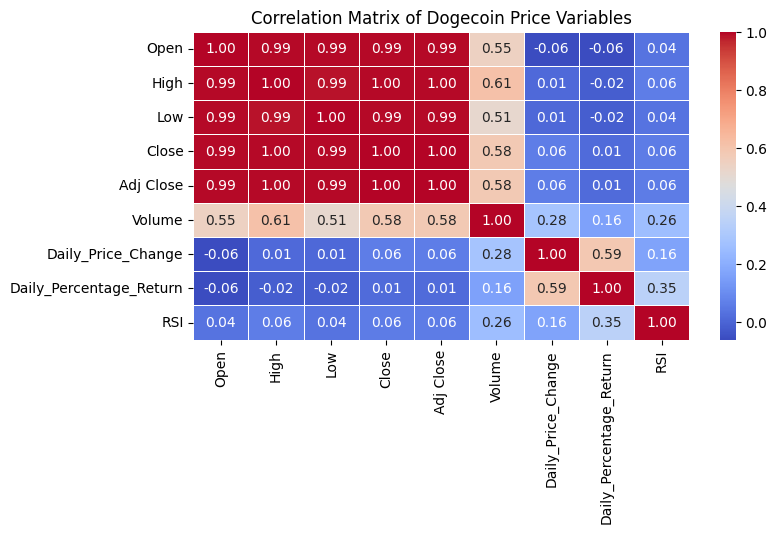

In [26]:

# Calculate the correlation matrix
correlation_matrix = dogecoin_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Dogecoin Price Variables')
plt.show()

*inferences*

* High Positive Correlations:The columns 'Open,' 'High,' 'Low,' and 'Close' show very high positive correlations with each other (close to 1)

* Negative Correlation with Daily Price Change:The 'Daily_Price_Change' column has a negative correlation with the 'Open,' 'High,' 'Low,' and 'Close' columns.

* Positive Correlation with Daily Percentage Return:The 'Daily_Percentage_Return' column has a positive correlation with the 'Daily_Price_Change' column, indicating that larger percentage returns are associated with larger price changes

* Weak Correlation with RSI:The 'RSI' column has weak positive correlations with the price-related columns. RSI is a momentum indicator, and its correlation with price-related columns may not be very strong.

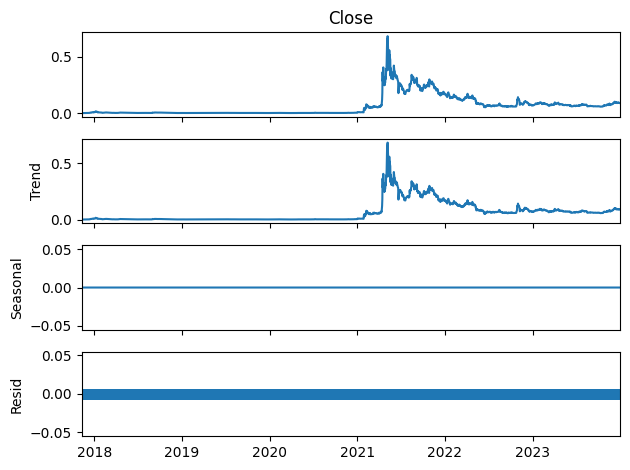

In [27]:

result = seasonal_decompose(dogecoin_data['Close'], model='additive', period=1)
result.plot()
plt.show()


*Inferences*

The graphical reperesntations shows the Decomposing a time series into its components (trend, seasonality, and residual) using seasonal decomposition techniques provides insights into the underlying patterns and fluctuations in the data

In [28]:
dogecoin_data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Price_Change,Daily_Percentage_Return,MACD,Signal,RSI
Date,,,,,,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550,NaN,NaN,MACD_12_26_9,MACDh_12_26_9,NaN
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520,-0.000252,-21.668094,MACD_12_26_9,MACDh_12_26_9,NaN
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080,0.000038,3.164025,MACD_12_26_9,MACDh_12_26_9,NaN
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960,-0.000163,-15.703272,MACD_12_26_9,MACDh_12_26_9,NaN
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270,0.000173,14.285717,MACD_12_26_9,MACDh_12_26_9,NaN


In [37]:
# Drop highly correlated columns and keep only 'Close'
selected_columns = ['Close', 'Daily_Price_Change', 'Daily_Percentage_Return', 'RSI']
dogecoin_model_data = dogecoin_data[selected_columns]
dogecoin_model_data.head()


,Close,Daily_Price_Change,Daily_Percentage_Return,RSI
Date,,,,
2017-11-09,0.001415,NaN,NaN,NaN
2017-11-10,0.001163,-0.000252,-21.668094,NaN
2017-11-11,0.001201,0.000038,3.164025,NaN
2017-11-12,0.001038,-0.000163,-15.703272,NaN
2017-11-13,0.001211,0.000173,14.285717,NaN


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


**Cheking For Stationality**

In [30]:
# Assuming 'Close' is the column of closing prices
closing_prices = dogecoin_data['Close']

# ADF Test
result_adf = adfuller(closing_prices, autolag='AIC')
print('ADF Test:')
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')
print(f'Critical Values: {result_adf[4]}')


ADF Test:
ADF Statistic: -2.7127486186845418
p-value: 0.07185806277965305
Critical Values: {'1%': -3.4333043732334776, '5%': -2.8628451528896735, '10%': -2.5674647958480494}


In [31]:
# KPSS Test
result_kpss = kpss(closing_prices, regression='c')
print('\nKPSS Test:')
print(f'KPSS Statistic: {result_kpss[0]}')
print(f'p-value: {result_kpss[1]}')
print(f'Critical Values: {result_kpss[3]}')


KPSS Test:
KPSS Statistic: 2.4375388189464053
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-31-1ddfc3bdebd0>:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




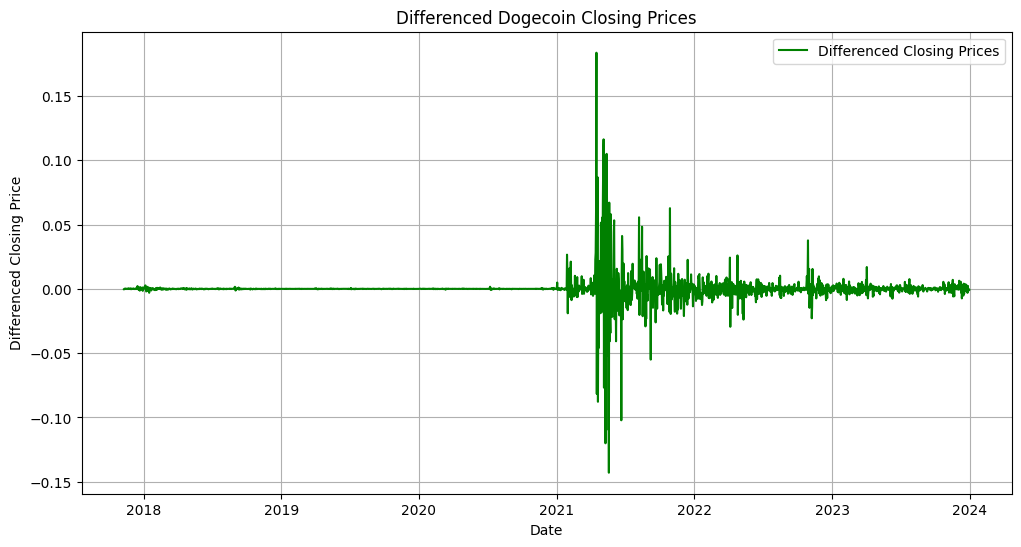

In [32]:
# Differencing the time series
dogecoin_data_diff = dogecoin_data['Close'].diff().dropna()
# Plotting the differenced time series
plt.figure(figsize=(12, 6))
plt.plot(dogecoin_data_diff.index, dogecoin_data_diff, label='Differenced Closing Prices', color='green')
plt.title('Differenced Dogecoin Closing Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Closing Price')
plt.legend()
plt.grid(True)
plt.show()


*inferences*

This code calculates the first difference of the closing prices and plots the differenced time series. Differencing is a common technique to remove trends and make a time series more stationary.

In [33]:
# KPSS Test on differenced series
result_kpss_diff = kpss(dogecoin_data_diff, regression='c')
print('\nKPSS Test on Differenced Series:')
print(f'KPSS Statistic: {result_kpss_diff[0]}')
print(f'p-value: {result_kpss_diff[1]}')
print(f'Critical Values: {result_kpss_diff[3]}')


KPSS Test on Differenced Series:
KPSS Statistic: 0.032888863012511184
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-33-61379be1e031>:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [34]:
# ADF Test on differenced series
result_adf_diff = adfuller(dogecoin_data_diff, autolag='AIC')
print('ADF Test on Differenced Series:')
print(f'ADF Statistic: {result_adf_diff[0]}')
print(f'p-value: {result_adf_diff[1]}')
print(f'Critical Values: {result_adf_diff[4]}')

ADF Test on Differenced Series:
ADF Statistic: -8.243296430657907
p-value: 5.641010380063722e-13
Critical Values: {'1%': -3.4333057085868255, '5%': -2.8628457425162424, '10%': -2.567465109783999}
